In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# importar librerías y modelo de regresión lineal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
url= "https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv"
df=pd.read_csv(url, sep=",")
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [18]:
df.set_index('Customer Id', inplace = True)
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [19]:
df.drop(columns = 'Unnamed: 0', inplace = True)#Borrar columna unnamed
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [21]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [22]:
df.dropna(inplace = True)#borrar faltantes

#Kmeans

In [23]:
#impotar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
#escalar datos
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

In [26]:
#Kmeans con 4 categorías de clientes
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_sc)

KMeans(n_clusters=4)

In [27]:
#Nueva columna clusters para guardar la nueva información
df['Clusters'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clusters
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,2
2,47,1,26,100,4.582,8.218,0.0,12.8,1
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,2
5,47,1,31,253,9.308,8.908,0.0,7.2,3


#Parte 2

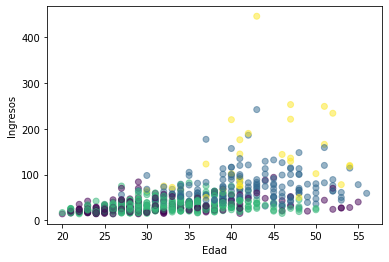

In [29]:
#Edad vs Ingresos
plt.scatter(df['Age'], df['Income'], c = df['Clusters'], alpha = 0.5);
plt.xlabel('Edad');
plt.ylabel('Ingresos');

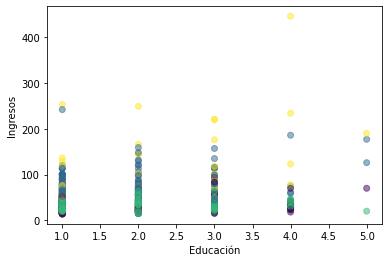

In [30]:
#educación vs Ingresos
plt.scatter(df['Edu'], df['Income'], c = df['Clusters'],alpha = 0.5);
plt.xlabel('Educación');
plt.ylabel('Ingresos');

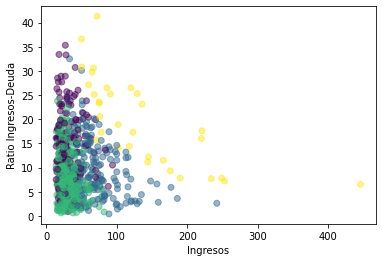

In [31]:
#Ingresos vs ratio de deuda-ingresos
plt.scatter(df['Income'], df['DebtIncomeRatio'], c = df['Clusters'], alpha = 0.5);
plt.xlabel('Ingresos');
plt.ylabel('Ratio Ingresos-Deuda');

In [32]:
#n valores de clusters
df['Clusters'].value_counts()

2    334
1    170
0    164
3     32
Name: Clusters, dtype: int64

In [33]:
segmento1 = df[df['Clusters'] == 0]
segmento2 = df[df['Clusters'] == 1]
segmento3 = df[df['Clusters'] == 2]
segmento4 = df[df['Clusters'] == 3]

segmentos = [segmento1, segmento2, segmento3, segmento4]

for segmento in segmentos:
  print(segmento.describe().T)

                 count       mean        std  ...      50%     75%     max
Age              164.0  31.597561   7.805708  ...  29.0000  36.000  55.000
Edu              164.0   1.884146   0.949003  ...   2.0000   2.000   5.000
Years Employed   164.0   3.859756   3.613009  ...   3.0000   6.000  15.000
Income           164.0  31.256098  15.108451  ...  27.0000  39.250  94.000
Card Debt        164.0   1.573884   1.429028  ...   1.2050   2.064   6.912
Other Debt       164.0   2.811689   2.147853  ...   2.3355   3.809  10.754
Defaulted        164.0   0.975610   0.154730  ...   1.0000   1.000   1.000
DebtIncomeRatio  164.0  14.056707   7.386857  ...  13.2500  18.750  35.300
Clusters         164.0   0.000000   0.000000  ...   0.0000   0.000   0.000

[9 rows x 8 columns]
                 count       mean        std  ...      50%      75%      max
Age              170.0  41.600000   5.989537  ...  41.0000  46.0000   56.000
Edu              170.0   1.611765   0.864748  ...   1.0000   2.0000    5.0

In [34]:
prom_edad = [np.mean(segmento['Age']) for segmento in segmentos]
prom_ingreso = [np.mean(segmento['Income']) for segmento in segmentos]
prom_deudaingreso = [np.mean(segmento['DebtIncomeRatio']) for segmento in segmentos]

In [35]:
prom_df = pd.DataFrame({'Segmento de Cliente' : ['segmento1', 'segmento2', 'segmento3', 'segmento4'],
                             'Edad Promedio' : prom_edad,
                             'Ingresos Promedio' : prom_ingreso,
                             'Proporcion Deuda-Ingresos' : prom_deudaingreso})

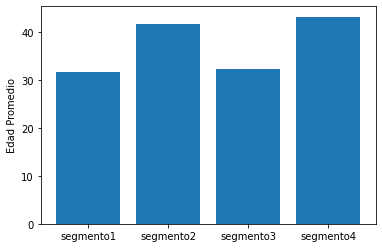

In [36]:
#edad promedio 
plt.bar(prom_df['Segmento de Cliente'], prom_df['Edad Promedio']);
plt.ylabel('Edad Promedio');

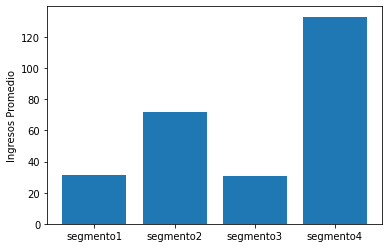

In [37]:
#ingreso por segmento
plt.bar(prom_df['Segmento de Cliente'], prom_df['Ingresos Promedio']);
plt.ylabel('Ingresos Promedio');

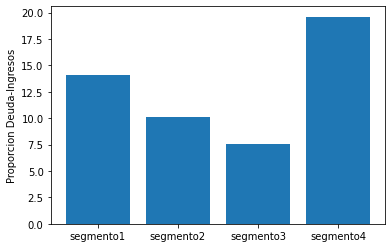

In [42]:
#proporción de deuda por segmento
plt.bar(prom_df['Segmento de Cliente'], prom_df['Proporcion Deuda-Ingresos']);
plt.ylabel('Proporcion Deuda-Ingresos');